In [1]:
import numpy as np
from numpy import array, newaxis, expand_dims
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf as pdflib
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

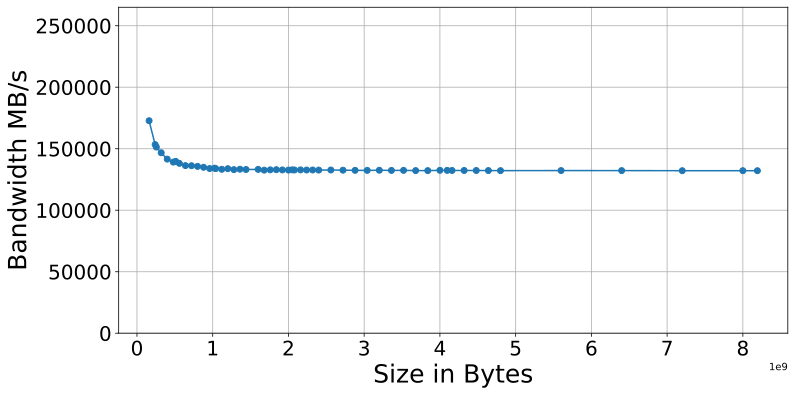

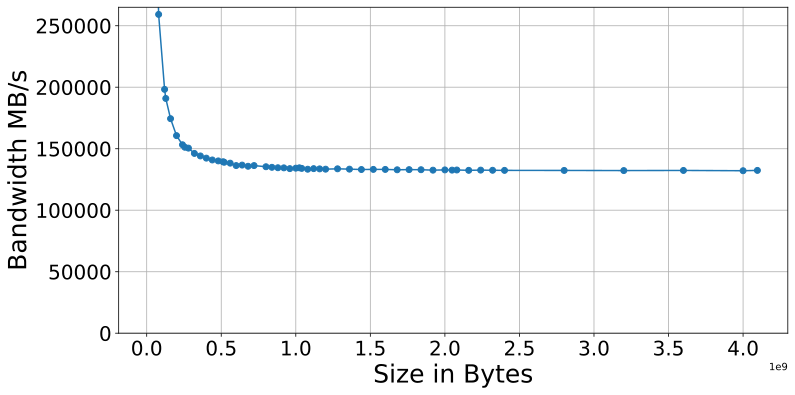

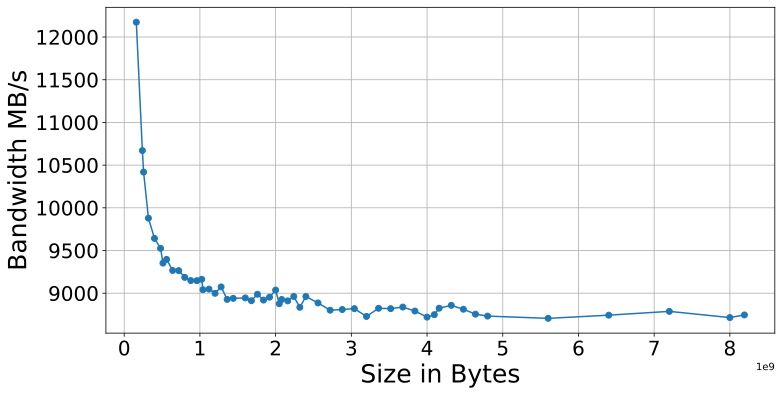

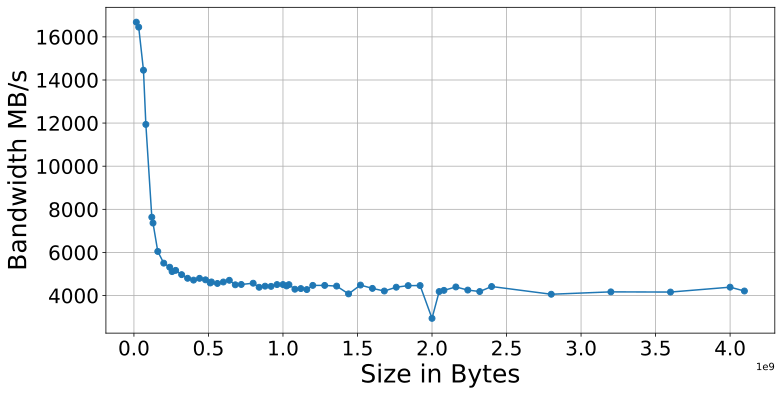

In [105]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
skylake_res = skylake_res[skylake_res["Size"] >= 16000000]
pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_double_precision.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_single_precision.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()



pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_double_precision.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
# ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_single_precision.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
# ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()



# scal_res = skylake_res[(skylake_res["Operation"] == "Scale") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# add_res = skylake_res[(skylake_res["Operation"] == "Add") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# triad_res = skylake_res[(skylake_res["Operation"] == "Triad") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()


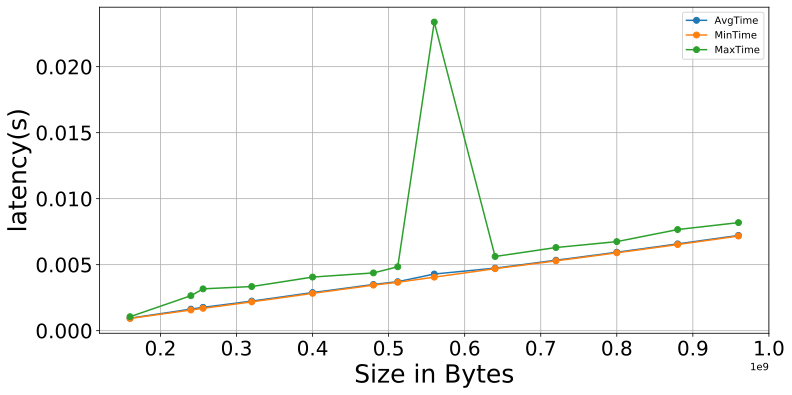

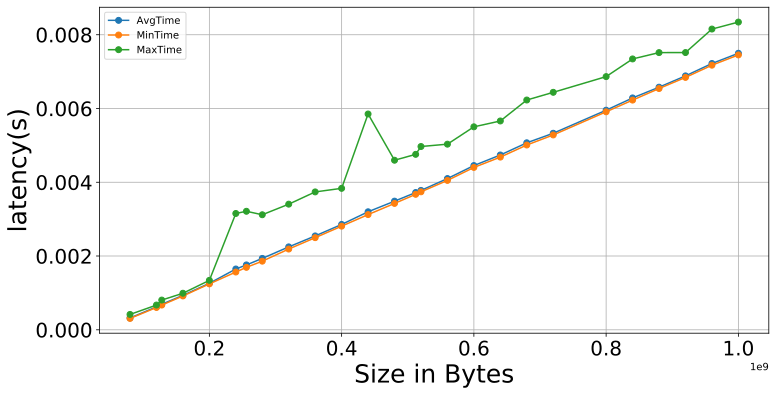

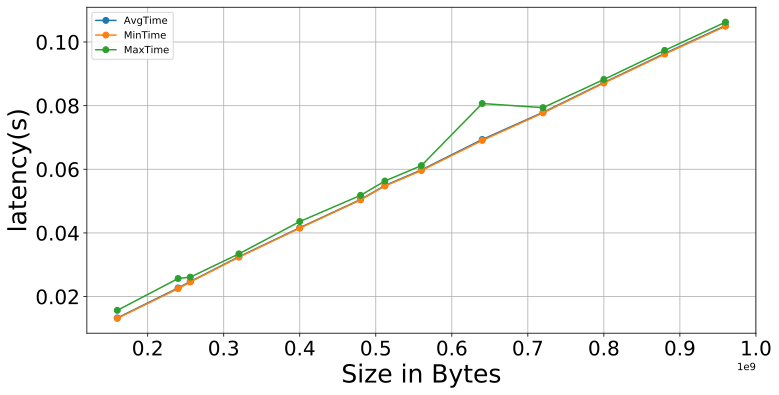

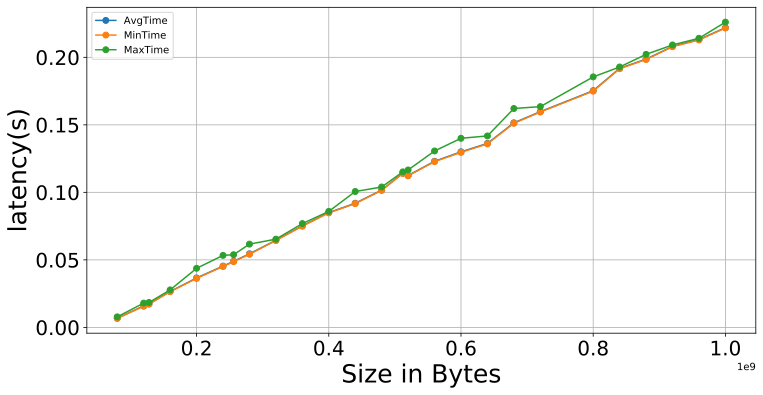

In [22]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_double_precision_time.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res[copy_res["Size"] <= 1000000000]
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_single_precision_time.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res[copy_res["Size"] <= 1000000000]
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_double_precision_time.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res[random_copy_res["Size"] <= 1000000000]
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_single_precision_time.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res[random_copy_res["Size"] <= 1000000000]
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

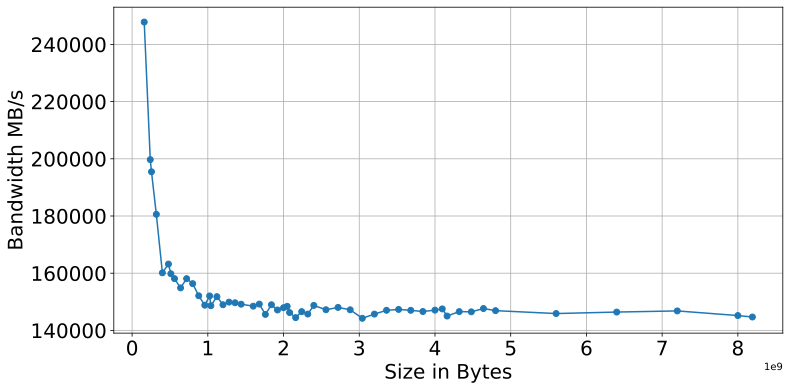

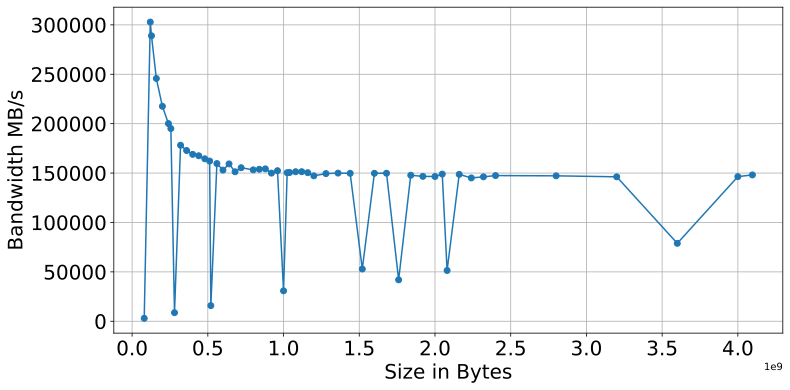

In [7]:
cascade_lake_res = pd.read_csv("../../STREAM/Results/CASCADE_LAKE.csv")
pdf = pdflib.PdfPages("figures/stream/cascade_lake_mpi_copy_double_precision.pdf")
copy_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Copy") & (cascade_lake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=20)
ax.set_xlabel("Size in Bytes", fontsize=20)
ax.grid(True)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/cascade_lake_mpi_copy_single_precision.pdf")
copy_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Copy") & (cascade_lake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=20)
ax.set_xlabel("Size in Bytes", fontsize=20)
ax.grid(True)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


# scal_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Scale") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# add_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Add") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# triad_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Triad") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()


# OSU Benchmark

# Cascade Lake

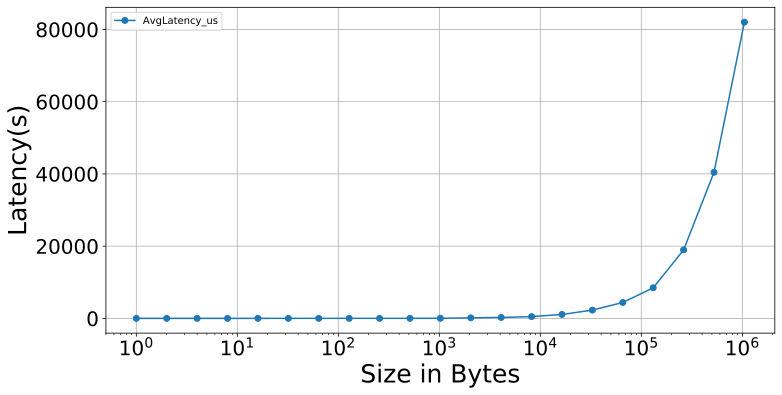

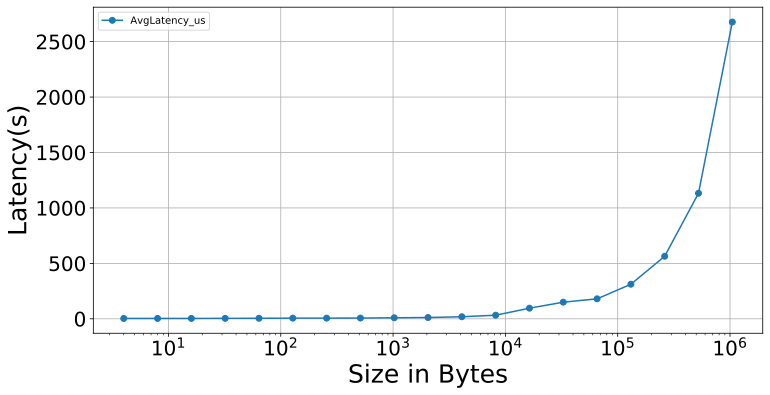

In [10]:
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/cascade_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()

pdf = pdflib.PdfPages("figures/osu/cascade_lake_mpi_allgatherv.pdf")
fig1,ax1 = plt.subplots()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/osu/cascade_lake_mpi_allreduce.pdf")
fig1,ax1 = plt.subplots()
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/cascade_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

# Skylake

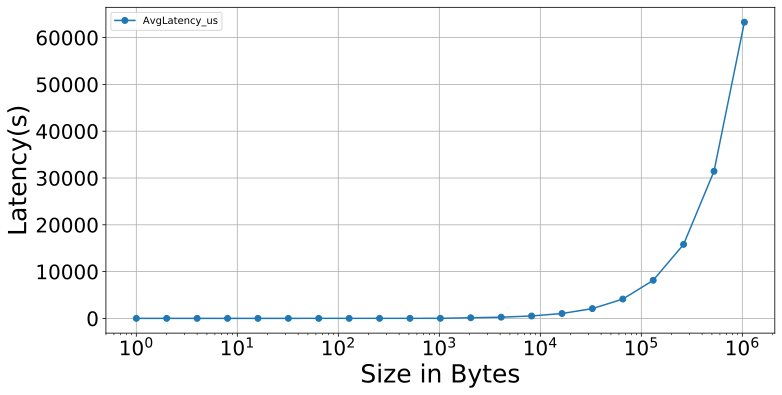

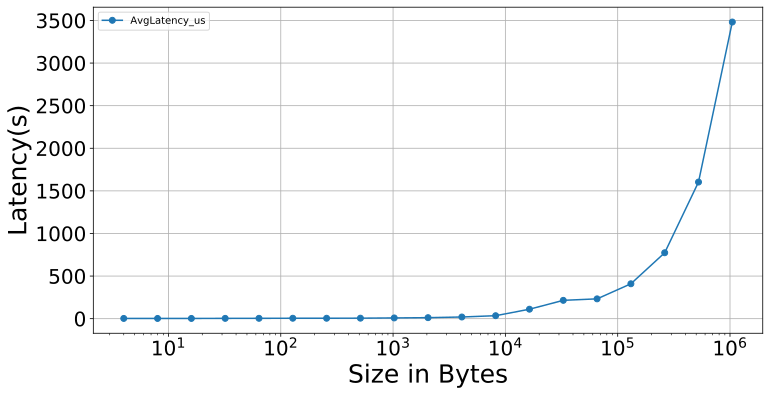

In [11]:
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/skylake_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()

pdf = pdflib.PdfPages("figures/osu/skylake_mpi_allgatherv.pdf")
fig1,ax1 = plt.subplots()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/osu/skylake_mpi_allreduce.pdf")
fig1,ax1 = plt.subplots()
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/skylake_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

# FMA FLOPS

# MPI

42.83539999999999
85.66865000000001


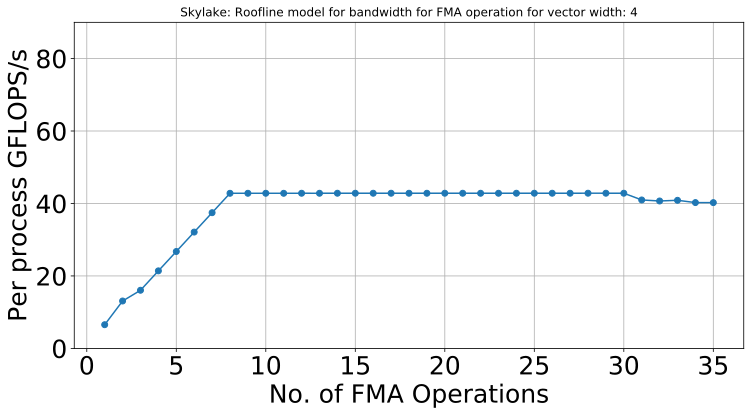

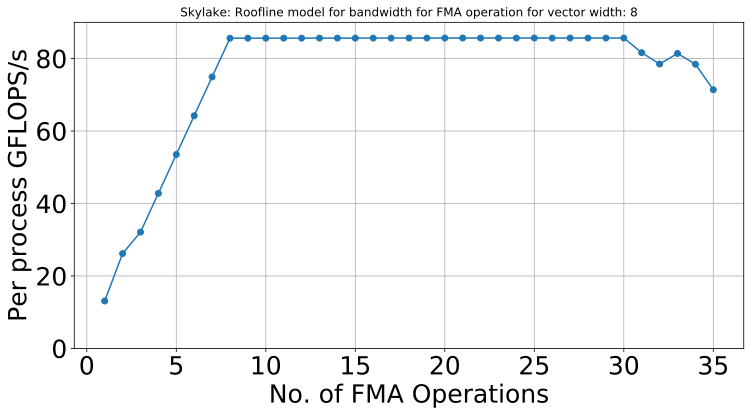

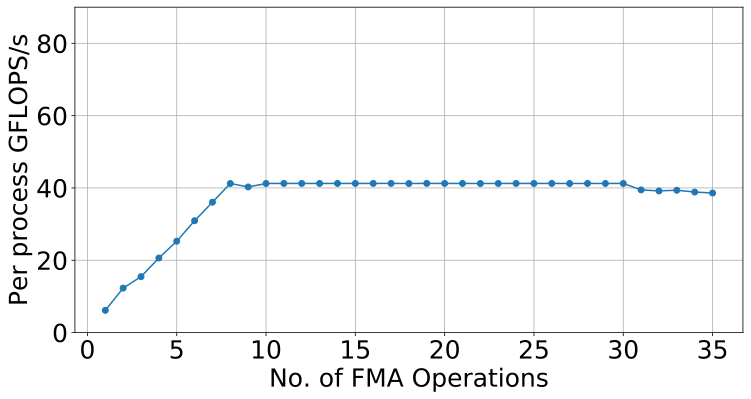

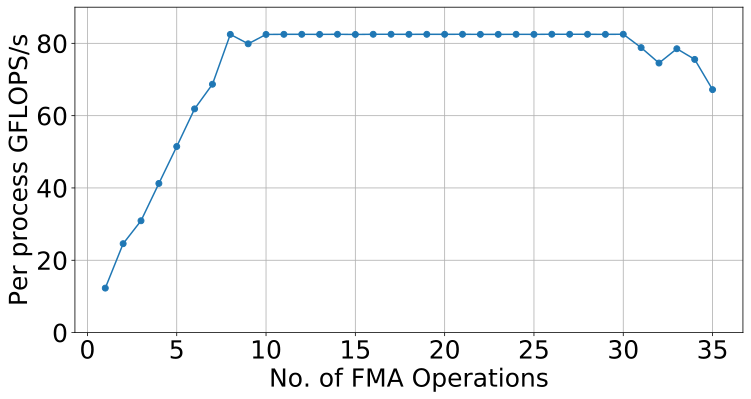

In [134]:
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/skylake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax1, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()
    print(max(vec_data["AvgGFLOPSPerSec"]))
    
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/cascade_lake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    
    

# OpenMP

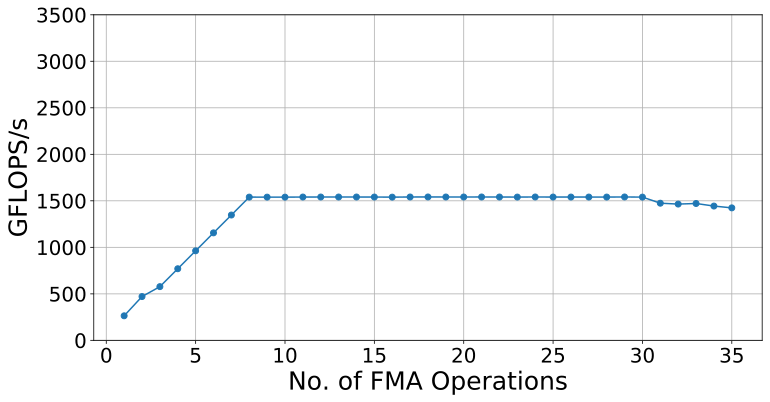

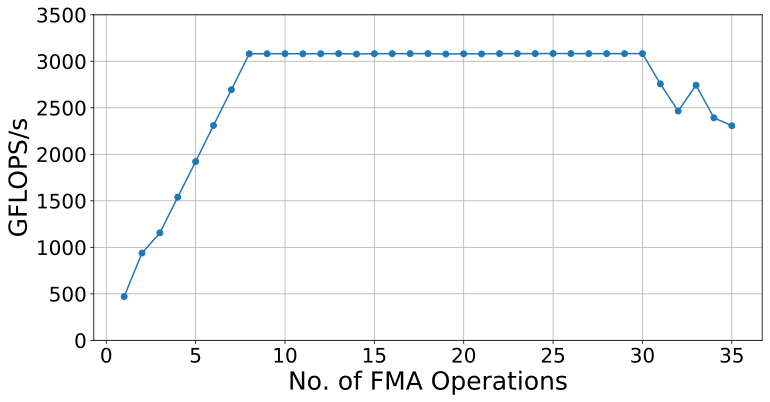

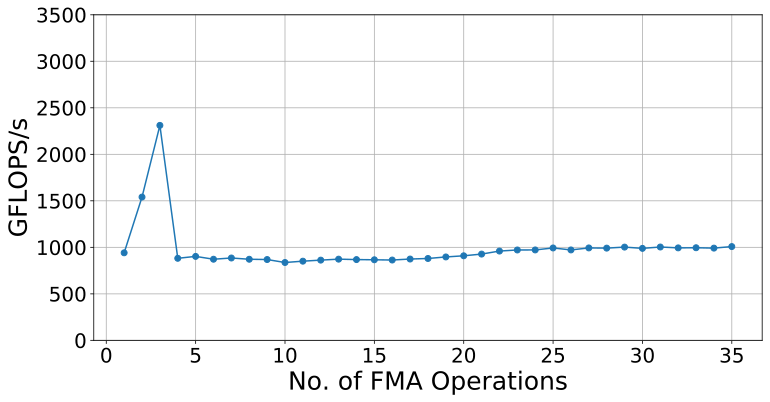

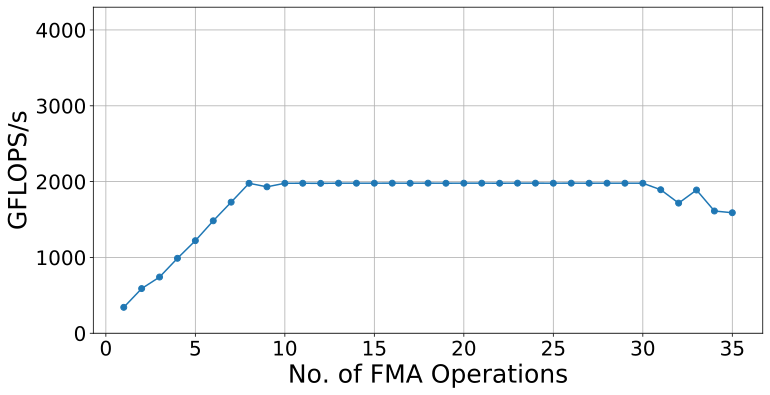

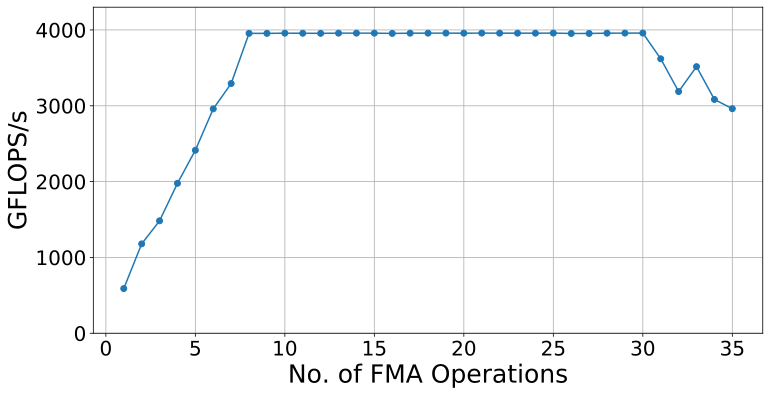

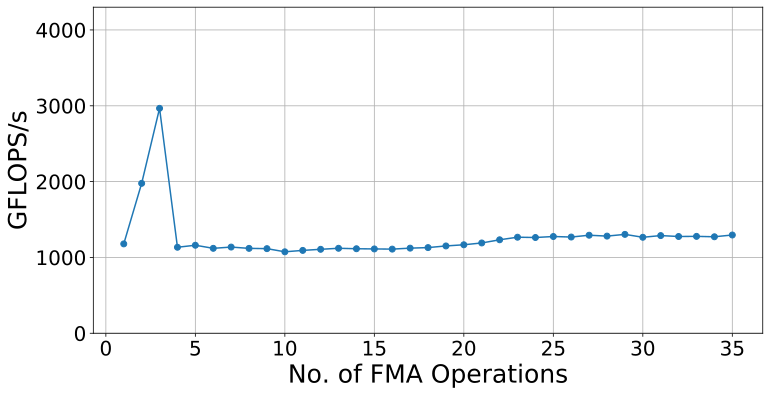

In [9]:
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/omp/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()

for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/skylake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", ax=ax1, style="-o", x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,3500)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()

fmaRes = pd.read_csv("../../SpMVMicroBenchmark/omp/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/cascade_lake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,4300)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    

# Build-Up SpMV Model

In [145]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_ref = csr_2d_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "AvgTime", "AvgBcastTime", "AvgMatmulTime"]]
csr_2d_ref = csr_2d_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_2d_test = pd.DataFrame()
csr_2d_test["Name"] = csr_2d_ref["Name"]
csr_2d_test["Nodes"] = csr_2d_ref["Nodes"]
csr_2d_test["nProcess"] = csr_2d_ref["nProcess"]
csr_2d_test["AvgRow"] = csr_2d_ref["AvgRow"]
csr_2d_test["NNZ"] = csr_2d_ref["NNZ"]
csr_2d_test["Size"] = 36*((12*csr_2d_ref["AvgRow"]) + (12*csr_2d_ref["NNZ"]))
csr_2d_test["RandomSize"] = 36*(4*csr_2d_ref["NNZ"])
csr_2d_test["AvgTime"] = csr_2d_ref["AvgTime"]/1000
csr_2d_test["AvgBcastTime"] = csr_2d_ref["AvgBcastTime"]/1000
csr_2d_test["AvgMatmulTime"] = csr_2d_ref["AvgMatmulTime"]/1000
csr_2d_test = csr_2d_test[csr_2d_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_2d_test["TimeForFLOPS"] = (1.0e-9 * csr_2d_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_2d_test

,Name,Nodes,nProcess,AvgRow,NNZ,Size,RandomSize,AvgTime,AvgBcastTime,AvgMatmulTime,TimeForFLOPS
0,coPapersCiteseer,4,144,36176,222732,111848256,32073408,0.002401,0.000229,0.001869,0.000042
1,coPapersDBLP,4,144,45041,211746,110931984,30491424,0.002603,0.000283,0.001823,0.000040
2,audikw1,8,256,58981,299641,154924704,43148304,0.003009,0.000415,0.002208,0.000056
3,ldoor,8,256,59513,178008,102609072,25633152,0.002761,0.000415,0.001972,0.000033
4,audikw1,7,225,62913,340925,174458016,49093200,0.004264,0.000456,0.002579,0.000064
...,...,...,...,...,...,...,...,...,...,...,...
133,nlpkkt240,4,144,2332800,5183880,3247205760,746478720,0.117953,0.008732,0.092395,0.000968
134,europe,8,256,3182002,422302,1557059328,60811488,0.055300,0.014693,0.021929,0.000079
135,europe,7,225,3394135,480485,1673835840,69189840,0.065219,0.015650,0.027536,0.000090
136,europe,5,169,3916310,639700,1968196320,92116800,0.075963,0.015459,0.035637,0.000119


In [122]:
csr_2d_spmv.keys()

Index(['Name', 'MatrixSize', 'AvgRow', 'NNZ', 'NonZeroPerRow', 'AvgNPRSD',
       'AvgTime', 'AvgBcastTime', 'AvgMatmulTime', 'AvgReduceTime', 'TotalRun',
       'Nodes', 'nProcess', 'ProcessorsName', 'DataType'],
      dtype='object')

# Memory Access Model on Skylake(Single Precision)

In [146]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
skylake_res = skylake_res[skylake_res["Size"] >= 100000000]
##### Sequential Access #####
dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


min_time_factor = 1.0
if min(dp_copy["AvgTime"]) < 1.0:
    min_time_factor = 1/min(dp_copy["AvgTime"])
for i,r in dp_copy.iterrows():
    dp_copy.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
# for i,r in csr_2d_test.iterrows():
#     csr_2d_test.at[i, "AvgMatmulTime"] = min_time_factor*r["AvgMatmulTime"]
    
train_x = dp_copy[["Size"]].to_numpy()
test_x = csr_2d_test[["Size"]].to_numpy()
csr_2d_X = np.concatenate((train_x, test_x), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(train_x)]
test_X = csr_2d_X[len(train_x):]
train_y = np.array(dp_copy["AvgTime"])
test_y = np.array(csr_2d_test["AvgMatmulTime"])
        
scores = []
best = 0
# c=20e4
# e=0.001
for c in np.linspace(2e1,6e4, num=50):
    for e in np.linspace(0.0001, 0.9, 20):
        best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
        cv = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_index, test_index in cv.split(X):
            X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
            best_svr.fit(X_train, y_train)
            scores.append(best_svr.score(X_test, np.array(y_test)))
            if best < np.mean(scores):
                best = np.mean(scores)
                best_param = {"C": c, "epsilon": e}
svr1 = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr1.fit(X, train_y)


#### Random Access ####
# dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
# dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()

# random_min_time_factor = 1.0
# if min(dp_random_copy["AvgTime"]) < 1.0:
#     random_min_time_factor = 1/min(dp_random_copy["AvgTime"])
# for i,r in dp_random_copy.iterrows():
#     dp_random_copy.at[i, "AvgTime"] = random_min_time_factor*r["AvgTime"]
    
# rn_train_x = dp_random_copy[["Size"]].to_numpy()
# rn_test_x = csr_2d_test[["RandomSize"]].to_numpy()
# rn_csr_2d_X = np.concatenate((rn_train_x, rn_test_x), axis=0)
# scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
# rn_csr_2d_X = scaler.fit_transform(rn_csr_2d_X)
# rn_X = rn_csr_2d_X[0:len(rn_train_x)]
# rn_test_X = rn_csr_2d_X[len(rn_train_x):]
# rn_train_y = np.array(dp_random_copy["AvgTime"])
        
# scores = []
# best = 0
# # c=20e4
# # e=0.001
# for c in np.linspace(2e1,6e4, num=50):
#     for e in np.linspace(0.0001, 0.9, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(rn_X):
#             X_train, X_test, y_train, y_test = rn_X[train_index], rn_X[test_index], rn_train_y[train_index], rn_train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
# svr2 = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
# svr2.fit(rn_X, rn_train_y)



SVR(C=20.0, cache_size=200, coef0=1, degree=3, epsilon=0.0001, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [147]:
y_pred = svr1.predict(test_X)
# rn_y_pred = svr2.predict(rn_test_X)

_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
time_for_flops = []
err = []
_model = []
m_size = []
max_err = 0
avg_err = 0
for i,row in csr_2d_test.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    dp_pred = (y_pred[i]/min_time_factor) + row["TimeForFLOPS"] #+ (rn_y_pred[i]/random_min_time_factor)
    print(row["Name"], row["AvgRow"], row["Nodes"], row["nProcess"], row["Size"], '{0:.5g}'.format(test_y[i]),"&",'{0:.5g}'.format(dp_pred), "&", 
          '{0:.4g}'.format(abs(test_y[i]-dp_pred)*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-dp_pred)*100/test_y[i]:
        max_err = abs(test_y[i]-dp_pred)*100/test_y[i]
    avg_err += abs(test_y[i]-dp_pred)*100/test_y[i]
    rows.append(row["Size"])
    a_time.append(float('{0:.5g}'.format(test_y[i])))
    p_time.append(float('{0:.5g}'.format(dp_pred)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-dp_pred)*100/test_y[i])))
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    _model.append("Single Precision")
    time_for_flops.append(row["TimeForFLOPS"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/csr_2d_test.shape[0])

_pred["Matrices"] = mat
_pred["Nodes"] = node
_pred["nProcess"] = prcs
_pred["Sizes"] = rows
_pred["Model"] = _model
_pred["TimeForFLOPS"] = time_for_flops
_pred["Actual Time"] = a_time
_pred["Predicted Time"] = p_time
_pred["Error"] = err

coPapersCiteseer 36176 4 144 111848256 0.001869 & 0.00070349 & 62.36\% \\ \hline
coPapersDBLP 45041 4 144 110931984 0.0018226 & 0.00069441 & 61.9\% \\ \hline
audikw1 58981 8 256 154924704 0.0022078 & 0.0010484 & 52.51\% \\ \hline
ldoor 59513 8 256 102609072 0.0019721 & 0.00062424 & 68.35\% \\ \hline
audikw1 62913 7 225 174458016 0.0025791 & 0.001206 & 53.24\% \\ \hline
ldoor 63481 7 225 114918480 0.0022183 & 0.00072328 & 67.4\% \\ \hline
eu-2005 66359 5 169 111173472 0.0020741 & 0.00069238 & 66.62\% \\ \hline
eu-2005 71889 4 144 127886688 0.0023259 & 0.00082682 & 64.45\% \\ \hline
audikw1 72592 5 169 227441952 0.0035078 & 0.0016338 & 53.43\% \\ \hline
ldoor 73247 5 169 148129776 0.0023031 & 0.00099066 & 56.99\% \\ \hline
audikw1 78642 4 144 264097584 0.0039532 & 0.0019299 & 51.18\% \\ \hline
ldoor 79351 4 144 170990352 0.0026331 & 0.0011748 & 55.38\% \\ \hline
af_shell10 94255 8 256 127057680 0.0021052 & 0.00081593 & 61.24\% \\ \hline
af_shell10 100538 7 225 141667488 0.0023475 & 0.000

In [79]:
test_matrices = [
    "delaunay_n20"
    , "NACA0015"
    , "belgium"
    , "AS365"
    , "roadNet-TX"
    , "road_central"
    , "NLR"
    , "hugetrace-00010"
    , "nlpkkt200"
    , "nlpkkt240"
    , "nlpkkt160"
    , "uk2002"
]

random_test_matrices = [
    "delaunay_n20_random"
    , "NACA0015_random"
    , "belgium_random"
    , "AS365_random"
    , "roadNet-TX_random"
    , "road_central_random"
    , "NLR_random"
    , "hugetrace-00010_random"
    , "nlpkkt200_random"
    , "nlpkkt240_random"
    , "nlpkkt160_random"
    , "uk2002_random"
]

random_to_org_map = {
    "delaunay_n20_random"      : "delaunay_n20"
    , "NACA0015_random"        : "NACA0015"
    , "belgium_random"         : "belgium"
    , "AS365_random"           : "AS365"
    , "roadNet-TX_random"      : "roadNet-TX"
    , "road_central_random"    : "road_central"
    , "NLR_random"             : "NLR"
    , "hugetrace-00010_random" : "hugetrace-00010"
    , "nlpkkt200_random"       : "nlpkkt200"
    , "nlpkkt240_random"       : "nlpkkt240"
    , "nlpkkt160_random"       : "nlpkkt160"
    , "uk2002_random"          : "uk2002"
}

In [177]:
_pred = _pred.sort_values(by=["Matrices", "Nodes"]).reset_index(drop=True)
data = _pred[_pred["Matrices"].isin(test_matrices)].reset_index(drop=True)
for i,r in data.iterrows():
    print(r["Matrices"], "&", r["Nodes"], "&", r["nProcess"], "&", '{:,.3f}'.format(r["Actual Time"]*1000), "&", '{:,.3f}'.format(r["Predicted Time"]*1000), "&", str(r["Error"])+"\\%", "\\\\ \hline")

AS365 & 4 & 144 & 3.285 & 1.406 & 57.2\% \\ \hline
AS365 & 5 & 169 & 2.832 & 1.244 & 56.08\% \\ \hline
AS365 & 7 & 225 & 1.949 & 0.997 & 48.85\% \\ \hline
AS365 & 8 & 256 & 1.738 & 0.902 & 48.11\% \\ \hline
NLR & 4 & 144 & 3.674 & 1.561 & 57.51\% \\ \hline
NLR & 5 & 169 & 3.184 & 1.383 & 56.56\% \\ \hline
NLR & 7 & 225 & 2.416 & 1.113 & 53.95\% \\ \hline
NLR & 8 & 256 & 1.960 & 1.008 & 48.58\% \\ \hline
hugetrace-00010 & 4 & 144 & 9.267 & 4.015 & 56.67\% \\ \hline
hugetrace-00010 & 5 & 169 & 9.069 & 3.629 & 59.99\% \\ \hline
hugetrace-00010 & 7 & 225 & 7.102 & 3.032 & 57.31\% \\ \hline
hugetrace-00010 & 8 & 256 & 5.629 & 2.797 & 50.31\% \\ \hline
nlpkkt160 & 4 & 144 & 21.370 & 7.492 & 64.94\% \\ \hline
nlpkkt160 & 5 & 169 & 18.174 & 6.518 & 64.13\% \\ \hline
nlpkkt160 & 7 & 225 & 15.164 & 5.092 & 66.42\% \\ \hline
nlpkkt160 & 8 & 256 & 12.869 & 4.560 & 64.57\% \\ \hline
nlpkkt200 & 4 & 144 & 54.002 & 14.800 & 72.59\% \\ \hline
nlpkkt200 & 5 & 169 & 46.353 & 12.902 & 72.17\% \\ \hline
n

In [82]:
'{:,.2f}'.format(max(dp_copy["Size"]))

'4,096,000,000.00'

In [83]:
'{:,.2f}'.format(max(_pred["Sizes"]))

'3,583,128,960.00'

In [171]:
csr_gk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
csr_gk_spmv = csr_gk_spmv[~csr_gk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_gk_ref = csr_gk_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "AvgTime", "AvgGatherTime", "AvgMatmulTime"]]
csr_gk_ref = csr_gk_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_gk_test = pd.DataFrame()
csr_gk_test["Name"] = csr_gk_ref["Name"]
csr_gk_test["Nodes"] = csr_gk_ref["Nodes"]
csr_gk_test["nProcess"] = csr_gk_ref["nProcess"]
csr_gk_test["AvgRow"] = csr_gk_ref["AvgRows"]
csr_gk_test["NNZ"] = csr_gk_ref["AvgNNZ"]
csr_gk_test["Size"] = 36*((12*csr_gk_ref["AvgRows"]) + (12*csr_gk_ref["AvgNNZ"]))
csr_gk_test["RandomSize"] = 36*(4*csr_gk_ref["AvgNNZ"])
csr_gk_test["AvgTime"] = csr_gk_ref["AvgTime"]/1000
csr_gk_test["AvgGatherTime"] = csr_gk_ref["AvgGatherTime"]/1000
csr_gk_test["AvgMatmulTime"] = csr_gk_ref["AvgMatmulTime"]/1000
csr_gk_test = csr_gk_test[csr_gk_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_gk_test["TimeForFLOPS"] = (1.0e-9 * csr_2d_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_gk_test

,Name,Nodes,nProcess,AvgRow,NNZ,Size,RandomSize,AvgTime,AvgGatherTime,AvgMatmulTime,TimeForFLOPS
0,audikw1,8,256,3686,299641,131037264,43148304,0.006514,0.006021,0.000493,0.000042
1,audikw1,7,225,4194,340925,149091408,49093200,0.006515,0.005939,0.000576,0.000040
2,audikw1,5,169,5583,453894,198494064,65360736,0.007008,0.006225,0.000783,0.000056
3,ldoor,5,169,5634,269646,118920960,38829024,0.005467,0.004975,0.000492,0.000033
4,audikw1,4,144,6553,532695,232955136,76708080,0.007900,0.006953,0.000948,0.000064
...,...,...,...,...,...,...,...,...,...,...,...
65,nlpkkt240,4,144,194400,5183880,2323416960,746478720,0.198440,0.189729,0.008711,0.000019
66,europe,8,256,198875,422302,268348464,60811488,0.309565,0.307788,0.001777,0.000018
67,europe,7,225,226275,480485,305320320,69189840,0.295980,0.293654,0.002326,0.000012
68,europe,5,169,301254,639700,406492128,92116800,0.318403,0.315079,0.003324,0.000023


In [172]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
skylake_res = skylake_res[skylake_res["Size"] >= 100000000]
##### Sequential Access #####
dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


min_time_factor = 1.0
if min(dp_copy["AvgTime"]) < 1.0:
    min_time_factor = 1/min(dp_copy["AvgTime"])
for i,r in dp_copy.iterrows():
    dp_copy.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
# for i,r in csr_2d_test.iterrows():
#     csr_2d_test.at[i, "AvgMatmulTime"] = min_time_factor*r["AvgMatmulTime"]
    
train_x = dp_copy[["Size"]].to_numpy()
test_x = csr_gk_test[["Size"]].to_numpy()
csr_gk_X = np.concatenate((train_x, test_x), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_gk_X = scaler.fit_transform(csr_gk_X)
X = csr_gk_X[0:len(train_x)]
test_X = csr_gk_X[len(train_x):]
train_y = np.array(dp_copy["AvgTime"])
test_y = np.array(csr_gk_test["AvgMatmulTime"])
        
scores = []
best = 0
# c=20e4
# e=0.001
for c in np.linspace(2e1,6e4, num=50):
    for e in np.linspace(0.0001, 0.9, 20):
        best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
        cv = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_index, test_index in cv.split(X):
            X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
            best_svr.fit(X_train, y_train)
            scores.append(best_svr.score(X_test, np.array(y_test)))
            if best < np.mean(scores):
                best = np.mean(scores)
                best_param = {"C": c, "epsilon": e}
svr1 = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr1.fit(X, train_y)


#### Random Access ####
# dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
# dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()

# random_min_time_factor = 1.0
# if min(dp_random_copy["AvgTime"]) < 1.0:
#     random_min_time_factor = 1/min(dp_random_copy["AvgTime"])
# for i,r in dp_random_copy.iterrows():
#     dp_random_copy.at[i, "AvgTime"] = random_min_time_factor*r["AvgTime"]
    
# rn_train_x = dp_random_copy[["Size"]].to_numpy()
# rn_test_x = csr_2d_test[["RandomSize"]].to_numpy()
# rn_csr_2d_X = np.concatenate((rn_train_x, rn_test_x), axis=0)
# scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
# rn_csr_2d_X = scaler.fit_transform(rn_csr_2d_X)
# rn_X = rn_csr_2d_X[0:len(rn_train_x)]
# rn_test_X = rn_csr_2d_X[len(rn_train_x):]
# rn_train_y = np.array(dp_random_copy["AvgTime"])
        
# scores = []
# best = 0
# # c=20e4
# # e=0.001
# for c in np.linspace(2e1,6e4, num=50):
#     for e in np.linspace(0.0001, 0.9, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(rn_X):
#             X_train, X_test, y_train, y_test = rn_X[train_index], rn_X[test_index], rn_train_y[train_index], rn_train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
# svr2 = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
# svr2.fit(rn_X, rn_train_y)



SVR(C=20.0, cache_size=200, coef0=1, degree=3, epsilon=0.0001, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [173]:
y_pred = svr1.predict(test_X)
# rn_y_pred = svr2.predict(rn_test_X)

gk_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
time_for_flops = []
err = []
_model = []
m_size = []
max_err = 0
avg_err = 0
for i,row in csr_gk_test.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    dp_pred = (y_pred[i]/min_time_factor) + row["TimeForFLOPS"] #+ (rn_y_pred[i]/random_min_time_factor)
    print(row["Name"], row["AvgRow"], row["Nodes"], row["nProcess"], row["Size"], '{0:.5g}'.format(test_y[i]),"&",'{0:.5g}'.format(dp_pred), "&", 
          '{0:.4g}'.format(abs(test_y[i]-dp_pred)*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-dp_pred)*100/test_y[i]:
        max_err = abs(test_y[i]-dp_pred)*100/test_y[i]
    avg_err += abs(test_y[i]-dp_pred)*100/test_y[i]
    rows.append(row["Size"])
    a_time.append(float('{0:.5g}'.format(test_y[i])))
    p_time.append(float('{0:.5g}'.format(dp_pred)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-dp_pred)*100/test_y[i])))
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    _model.append("Single Precision")
    time_for_flops.append(row["TimeForFLOPS"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/csr_2d_test.shape[0])

gk_pred["Matrices"] = mat
gk_pred["Nodes"] = node
gk_pred["nProcess"] = prcs
gk_pred["Sizes"] = rows
gk_pred["Model"] = _model
gk_pred["TimeForFLOPS"] = time_for_flops
gk_pred["Actual Time"] = a_time
gk_pred["Predicted Time"] = p_time
gk_pred["Error"] = err

audikw1 3686 8 256 131037264 0.00049329 & 0.00085044 & 72.4\% \\ \hline
audikw1 4194 7 225 149091408 0.00057574 & 0.00098693 & 71.42\% \\ \hline
audikw1 5583 5 169 198494064 0.000783 & 0.0013825 & 76.56\% \\ \hline
ldoor 5634 5 169 118920960 0.00049167 & 0.00074912 & 52.36\% \\ \hline
audikw1 6553 4 144 232955136 0.00094755 & 0.0016547 & 74.63\% \\ \hline
ldoor 6612 4 144 139567104 0.00058068 & 0.00091212 & 57.08\% \\ \hline
af_shell10 6702 7 225 101130336 0.00041612 & 0.00061504 & 47.8\% \\ \hline
af_shell10 8923 5 169 134641440 0.00054921 & 0.00087836 & 59.93\% \\ \hline
af_shell10 10472 4 144 158016528 0.0006748 & 0.0011006 & 63.11\% \\ \hline
nlpkkt120 13837 8 256 163426896 0.0006768 & 0.0011077 & 63.67\% \\ \hline
com-lj 15617 8 256 123795216 0.001365 & 0.00085276 & 37.53\% \\ \hline
nlpkkt120 15744 7 225 185943600 0.00073014 & 0.0012893 & 76.58\% \\ \hline
com-lj 17768 7 225 140851440 0.0015266 & 0.00092148 & 39.64\% \\ \hline
cage15 20136 8 256 167399136 0.00091726 & 0.0011303 &

In [178]:
gk_pred = gk_pred.sort_values(by=["Matrices", "Nodes"]).reset_index(drop=True)
data = gk_pred[gk_pred["Matrices"].isin(test_matrices)].reset_index(drop=True)
for i,r in data.iterrows():
    print(r["Matrices"], "&", r["Nodes"], "&", r["nProcess"], "&", '{:,.3f}'.format(r["Actual Time"]*1000), "&", '{:,.3f}'.format(r["Predicted Time"]*1000), "&", str(r["Error"])+"\\%", "\\\\ \hline")

hugetrace-00010 & 4 & 144 & 0.835 & 1.034 & 23.92\% \\ \hline
hugetrace-00010 & 5 & 169 & 0.682 & 0.768 & 12.47\% \\ \hline
nlpkkt160 & 4 & 144 & 2.728 & 5.167 & 89.42\% \\ \hline
nlpkkt160 & 5 & 169 & 2.189 & 4.323 & 97.54\% \\ \hline
nlpkkt160 & 7 & 225 & 1.595 & 3.201 & 100.7\% \\ \hline
nlpkkt160 & 8 & 256 & 1.427 & 2.793 & 95.7\% \\ \hline
nlpkkt200 & 4 & 144 & 5.163 & 10.144 & 96.47\% \\ \hline
nlpkkt200 & 5 & 169 & 4.301 & 8.629 & 100.6\% \\ \hline
nlpkkt200 & 7 & 225 & 3.112 & 6.434 & 106.8\% \\ \hline
nlpkkt200 & 8 & 256 & 2.679 & 5.661 & 111.3\% \\ \hline
nlpkkt240 & 4 & 144 & 8.711 & 17.648 & 102.6\% \\ \hline
nlpkkt240 & 5 & 169 & 7.389 & 15.014 & 103.2\% \\ \hline
nlpkkt240 & 7 & 225 & 5.363 & 11.235 & 109.5\% \\ \hline
nlpkkt240 & 8 & 256 & 4.524 & 9.871 & 118.2\% \\ \hline
road_central & 4 & 144 & 0.961 & 0.976 & 1.572\% \\ \hline
road_central & 5 & 169 & 0.850 & 0.769 & 9.569\% \\ \hline


# Cache Friendliness

In [90]:
cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS.csv")
cache_data = cache_data.groupby(["FileName", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
kway_cache_data = cache_data[cache_data["FileName"].isin(test_matrices)].reset_index(drop=True)
random_cache_data = cache_data[cache_data["FileName"].isin(random_test_matrices)].reset_index(drop=True)
kway_L3_data = kway_cache_data[(kway_cache_data["CacheType"] == "L3") & (kway_cache_data["Architecture"] == "Skylake")]
rand_L3_data = random_cache_data[(random_cache_data["CacheType"] == "L3") & (random_cache_data["Architecture"] == "Skylake")]

TestMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in rand_L3_data.groupby(["Process"]):
    for f,data in p_data.groupby(["FileName"]):
        ppn = 36
        data = data.reset_index()
        _mat.append(random_to_org_map[f])
        _avg_nnz.append(data["NNZ"].mean())
        _avg_row.append(data["Vtx"].mean())
        _p.append(p)
        prcs = p
        node = int(prcs/ppn)
        prcs = ppn*node
        if prcs > len(data):
            print(f, " not fully done! [found", len(data), "of", prcs, "]")
            node = int(len(data)/ppn)
            prcs = node*ppn
            print("Node count: ", node, " process count: ", prcs)
        data = data.iloc[0:prcs]
        nnz = int(data["NNZ"].sum()/node)

        avg_cache_miss = data["CacheMiss"].sum()
        avg_cache_hit = data["CacheHit"].sum()

        avg_cache_miss = avg_cache_miss/node
        avg_cache_hit = avg_cache_hit/node

        _nnnzpn.append(data["NNZ"].sum()/node)
        _rpn.append(data["Vtx"].sum()/node)
        _miss.append(avg_cache_miss)
        _hit.append(avg_cache_hit)
        _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
TestMatL3Cache["Matrices"] = _mat
TestMatL3Cache["Process"] = _p
TestMatL3Cache["AvgRows"] = _avg_row
TestMatL3Cache["AvgNNZ"] = _avg_nnz
TestMatL3Cache["RowsPerNode"] = _rpn
TestMatL3Cache["NNZPerNode"] = _nnnzpn
TestMatL3Cache["CacheMissPerNode"] = _miss
TestMatL3Cache["CacheHitPerNode"] = _hit
TestMatL3Cache["CacheAccessPerNode"] = _access
TestMatL3Cache

nlpkkt200_random  not fully done! [found 69 of 144 ]
Node count:  1  process count:  36
nlpkkt240_random  not fully done! [found 39 of 144 ]
Node count:  1  process count:  36


,Matrices,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,AS365,144,316607.0,1.578899e+05,11397852.0,5684038.0,2.613340e+06,3070697.50,5684038.0
1,NACA0015,144,86599.0,4.326136e+04,3117564.0,1557409.0,1.948182e+05,1362590.75,1557409.0
2,NLR,144,346981.0,1.734441e+05,12491316.0,6243988.0,3.151594e+06,3092393.75,6243988.0
3,belgium,144,120108.0,2.152736e+04,4323888.0,774985.0,2.564748e+05,518510.25,774985.0
4,delaunay_n20,144,87382.0,4.369008e+04,3145752.0,1572843.0,1.965692e+05,1376273.75,1572843.0
5,hugetrace-00010,144,1004787.0,2.511414e+05,36172332.0,9041089.5,7.487958e+06,1553132.00,9041089.5
6,nlpkkt160,144,695467.0,1.535920e+06,25036812.0,55293128.0,4.104062e+07,14252505.00,55293128.0
7,nlpkkt200,144,1353334.0,3.000028e+06,48720024.0,108003160.0,9.367483e+07,14328328.00,108003160.0
8,nlpkkt240,144,2332800.0,5.184087e+06,83980800.0,186625695.0,1.722618e+08,14363870.00,186625695.0
9,roadNet-TX,144,114994.0,2.668972e+04,4139784.0,960830.0,2.530208e+05,707809.25,960830.0


In [85]:
test_matrices

['delaunay_n20',
 'NACA0015',
 'belgium',
 'AS365',
 'roadNet-TX',
 'road_central',
 'NLR',
 'hugetrace-00010',
 'nlpkkt200',
 'nlpkkt240',
 'nlpkkt160',
 'uk2002']